In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('used-bikes.csv')

In [3]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,82500
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,230000
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,1100000
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,140000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,150000
...,...,...,...,...,...,...,...,...,...
7307,Hero Hunk Rear Disc 150cc,25000,Delhi,48587,First Owner,8,150,Hero,120000
7308,Bajaj Avenger 220cc,35000,Bangalore,60000,First Owner,9,220,Bajaj,160000
7309,Harley-Davidson Street 750 ABS,450000,Jodhpur,3430,First Owner,4,750,Harley-Davidson,630000
7310,Bajaj Dominar 400 ABS,139000,Hyderabad,21300,First Owner,4,400,Bajaj,245000


In [4]:
df.shape

(7312, 9)

In [5]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,82500
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,230000
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,1100000
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,140000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,150000


1. Are there any duplicate rows in the dataset? If yes, how many, and should they be removed (e.g., identical bike_name, kms_driven, price, etc.)?

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.duplicated(subset=['bike_name','kms_driven','price']).sum()

np.int64(78)

In [8]:
df.drop_duplicates(subset=['bike_name','kms_driven','price'])

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,82500
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,230000
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,1100000
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,140000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,150000
...,...,...,...,...,...,...,...,...,...
7306,Bajaj Avenger 220cc,50000,Bangalore,29134,First Owner,7,220,Bajaj,160000
7307,Hero Hunk Rear Disc 150cc,25000,Delhi,48587,First Owner,8,150,Hero,120000
7309,Harley-Davidson Street 750 ABS,450000,Jodhpur,3430,First Owner,4,750,Harley-Davidson,630000
7310,Bajaj Dominar 400 ABS,139000,Hyderabad,21300,First Owner,4,400,Bajaj,245000


In [9]:
df.duplicated().sum()

np.int64(0)

2. Is the price column consistently formatted as integers? Are there any non-numeric entries or missing values?

In [10]:
df['price'].dtype

dtype('O')

In [11]:
pd.to_numeric(df['price'],errors='coerce').isna().sum()

np.int64(1)

In [12]:
df['price'].isnull().sum()

np.int64(0)

3. How many missing values exist in each column? Particularly check Original Price, city, owner,age, power, and brand.

In [13]:
df.isnull().sum()

bike_name         0
price             0
city              0
kms_driven        0
owner             0
age               0
power             0
brand             0
Original Price    0
dtype: int64

In [14]:
df[['Original Price', 'city', 'owner','age', 'power','brand']].isnull().mean()

Original Price    0.0
city              0.0
owner             0.0
age               0.0
power             0.0
brand             0.0
dtype: float64

4. Are there inconsistent brand names? For example, is 'Royal Enfield' written in multiple ways(e.g., 'Royal Enfieldn', with extra spaces or Unicode)?

In [15]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Hero', 'Bajaj',
       'Suzuki', 'Benelli', 'Honda', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [16]:
df['brand'].str.strip().value_counts().head()

brand
Bajaj            2031
Royal Enfield    1364
Hero             1167
Honda             672
Yamaha            651
Name: count, dtype: int64

In [17]:
df['brand'] =df['brand'].str.strip()
df['brand']  =df['brand'].str.title()
df['brand']

0                   Tvs
1         Royal Enfield
2               Triumph
3                   Tvs
4                Yamaha
             ...       
7307               Hero
7308              Bajaj
7309    Harley-Davidson
7310              Bajaj
7311              Bajaj
Name: brand, Length: 7312, dtype: object

In [18]:
df['brand'].value_counts().head()

brand
Bajaj            2031
Royal Enfield    1364
Hero             1167
Honda             672
Yamaha            651
Name: count, dtype: int64

In [19]:
df['brand'].replace({'Royal Enfieldn': 'Royal Enfield',
    'Royall Enfield': 'Royal Enfield',
    'Enfield Royal': 'Royal Enfield'
})
df['brand'].value_counts().head(10)

brand
Bajaj              2031
Royal Enfield      1364
Hero               1167
Honda               672
Yamaha              651
Tvs                 481
Ktm                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Name: count, dtype: int64

5. Is the owner column standardized? Are values like 'First Owner', '1st Owner', or '1' present? How should they be unified?6. Are there any bikes with age = 0 or negative age? Also, check if age exceeds reasonable limits(e.g., >30 years).

In [20]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [21]:
df['owner']=df['owner'].str.lower().str.strip()
df['owner']

0       first owner
1       first owner
2       first owner
3       first owner
4       first owner
           ...     
7307    first owner
7308    first owner
7309    first owner
7310    first owner
7311    first owner
Name: owner, Length: 7312, dtype: object

In [22]:

df['owner']=df['owner'].replace({
    '1st Owner': 'First Owner',
    'First': 'First Owner',
    '1': 'First Owner',
    '2nd Owner': 'Second Owner',
    '2': 'Second Owner',
    '3rd Owner': 'Third Owner',
    '3': 'Third Owner',
    'Fourth Owner Or More': 'Fourth Owner',
    '4': 'Fourth Owner'
})
df['owner']

0       first owner
1       first owner
2       first owner
3       first owner
4       first owner
           ...     
7307    first owner
7308    first owner
7309    first owner
7310    first owner
7311    first owner
Name: owner, Length: 7312, dtype: object

In [23]:
df['owner'].value_counts()

owner
first owner             6623
second owner             591
third owner               87
fourth owner or more      11
Name: count, dtype: int64

In [24]:
df = df[(df['age'] > 0) & (df['age'] <= 30)]
df

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,first owner,3,110,Tvs,82500
1,Royal Enfield Classic 350cc,119900,Delhi,11000,first owner,4,350,Royal Enfield,230000
2,Triumph Daytona 675R,600000,Delhi,110,first owner,8,675,Triumph,1100000
3,TVS Apache RTR 180cc,65000,Bangalore,16329,first owner,4,180,Tvs,140000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,first owner,3,150,Yamaha,150000
...,...,...,...,...,...,...,...,...,...
7307,Hero Hunk Rear Disc 150cc,25000,Delhi,48587,first owner,8,150,Hero,120000
7308,Bajaj Avenger 220cc,35000,Bangalore,60000,first owner,9,220,Bajaj,160000
7309,Harley-Davidson Street 750 ABS,450000,Jodhpur,3430,first owner,4,750,Harley-Davidson,630000
7310,Bajaj Dominar 400 ABS,139000,Hyderabad,21300,first owner,4,400,Bajaj,245000


EDA  [Exploratory Data Analysis]

7. What is the distribution of price? Is it skewed? Should we apply log transformation for regression?

In [25]:
import matplotlib.pyplot  as plt


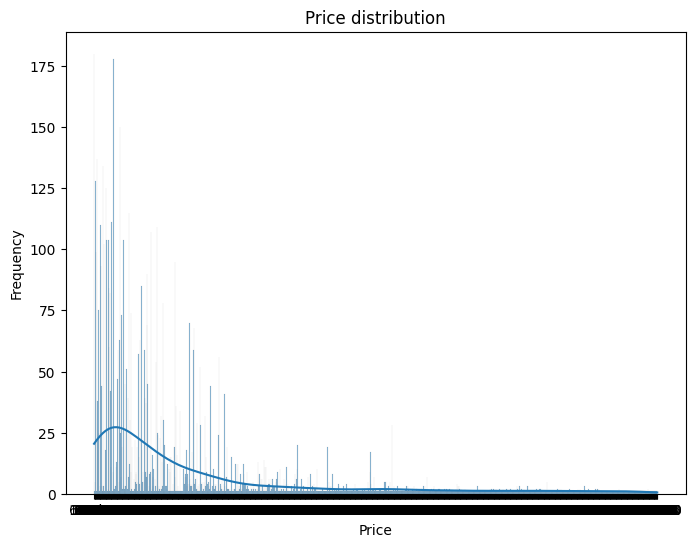

In [26]:
plt.figure(figsize=(8,6))
# plt.hist(df['price'],bins=30)
sns.histplot(df['price'],kde=True)
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [38]:
df['price'].skew

<bound method Series.skew of 0        35000
1       119900
2       600000
3        65000
4        80000
         ...  
7307     25000
7308     35000
7309    450000
7310    139000
7311     80000
Name: price, Length: 7290, dtype: object>

In [ ]:
# convert  a numerically
df['price']=pd.to_numeric(df['price'],errors='coerce')
df['price']

0        35000.0
1       119900.0
2       600000.0
3        65000.0
4        80000.0
          ...   
7307     25000.0
7308     35000.0
7309    450000.0
7310    139000.0
7311     80000.0
Name: price, Length: 7290, dtype: float64

In [ ]:
# Apply Transformation in regression
import numpy as np
df['price_log'] = np.log1p(df['price'])
df['price_log']


0       10.463132
1       11.694422
2       13.304687
3       11.082158
4       11.289794
          ...    
7307    10.126671
7308    10.463132
7309    13.017005
7310    11.842236
7311    11.289794
Name: price_log, Length: 7290, dtype: float64

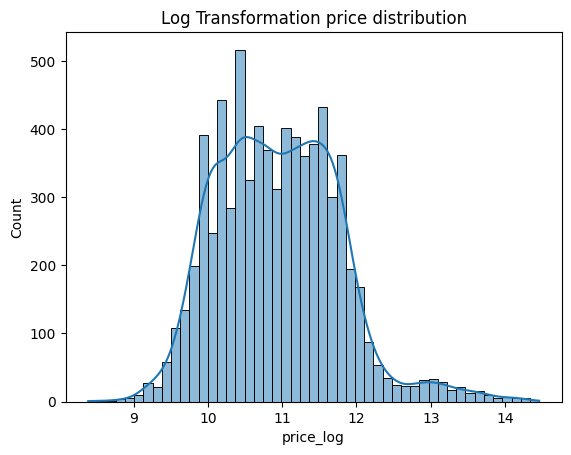

np.float64(0.5304487584363885)

In [ ]:
# again check 

# plt.hist(df['price_log'],bins=50)
sns.histplot(df['price_log'],kde=True)
plt.title("Log Transformation price distribution")
plt.show()

df['price_log'].skew()

8. How does price vary across different brands? Which brands have the highest and lowest average resale value?

In [ ]:
brand_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)
brand_price


brand
Mv                 1.266667e+06
Indian             1.100000e+06
Ducati             9.058684e+05
Triumph            8.125238e+05
Bmw                6.735000e+05
Harley-Davidson    4.734291e+05
Kawasaki           4.167116e+05
Benelli            2.983761e+05
Hyosung            2.432084e+05
Jawa               1.884286e+05
Ktm                1.479469e+05
Royal Enfield      1.117415e+05
Suzuki             1.048563e+05
Yamaha             7.011080e+04
Mahindra           7.005780e+04
Tvs                5.765194e+04
Honda              5.124134e+04
Bajaj              4.944527e+04
Hero               3.051241e+04
Lml                4.400000e+03
Name: price, dtype: float64

In [ ]:
highest_brand =brand_price.idxmax()
lowest_brand=brand_price.idxmin()
print("Highest brand =",highest_brand)
print('Lowest brand =',lowest_brand)

Highest brand = Mv
Lowest brand = Lml


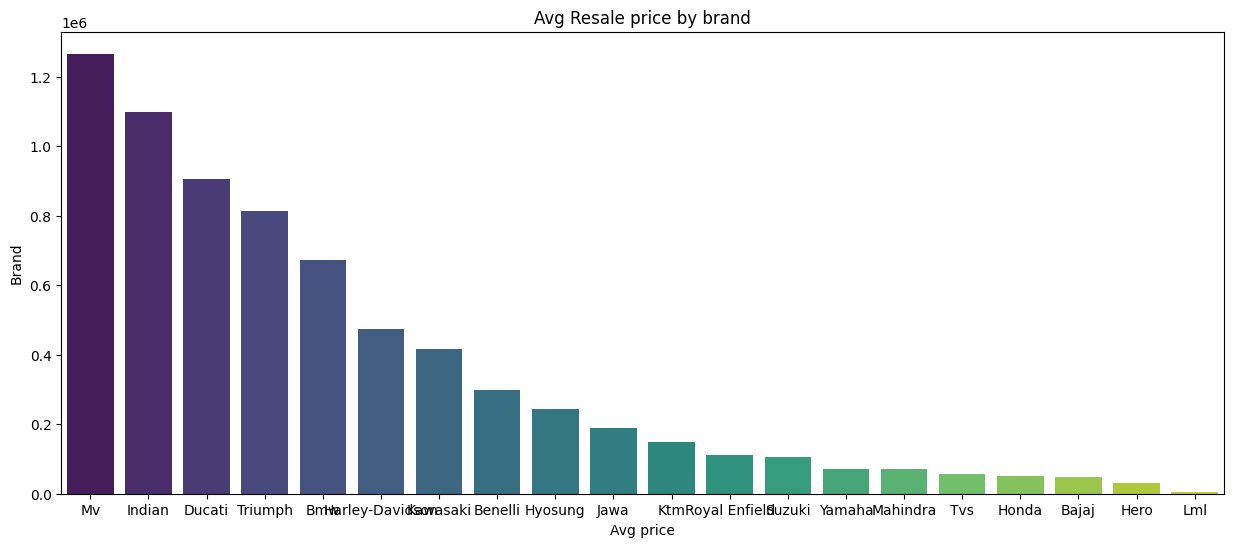

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.barplot(x=brand_price.index,y=brand_price.values,palette='viridis')
plt.title("Avg Resale price by brand")
plt.xlabel("Avg price")
plt.ylabel("Brand")
plt.show()


9. What is the relationship between kms_driven and price? Plot a scatter plot and compute correlation.

In [ ]:
# Firstly both column  are convert a numerically
df['kms_driven'] =pd.to_numeric(df['kms_driven'],errors='coerce')
df['price']=pd.to_numeric(df['price'],errors='coerce')

df=df.dropna(subset=['kms_driven','price'])
df

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price,price_log
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,first owner,3,110,Tvs,82500,10.463132
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000,first owner,4,350,Royal Enfield,230000,11.694422
2,Triumph Daytona 675R,600000.0,Delhi,110,first owner,8,675,Triumph,1100000,13.304687
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329,first owner,4,180,Tvs,140000,11.082158
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000,first owner,3,150,Yamaha,150000,11.289794
...,...,...,...,...,...,...,...,...,...,...
7307,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587,first owner,8,150,Hero,120000,10.126671
7308,Bajaj Avenger 220cc,35000.0,Bangalore,60000,first owner,9,220,Bajaj,160000,10.463132
7309,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430,first owner,4,750,Harley-Davidson,630000,13.017005
7310,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300,first owner,4,400,Bajaj,245000,11.842236


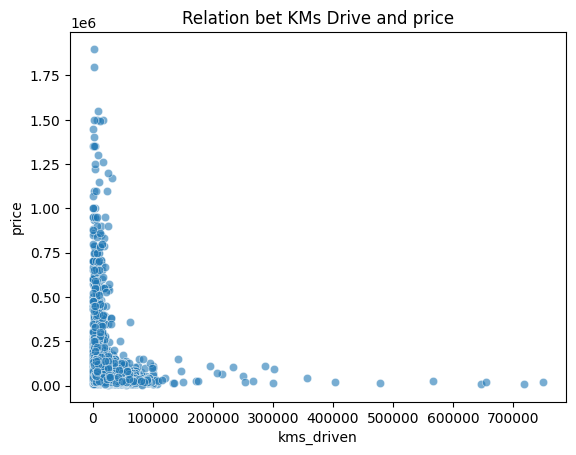

Correlation : -0.20076414195620415


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df,x='kms_driven',y='price',alpha=0.6)
plt.title("Relation bet KMs Drive and price")
plt.show()

print("Correlation :",df['kms_driven'].corr(df['price']))

10. How does age impact price? Is the depreciation linear, or does it flatten after a certain age?

In [ ]:
# Numeric all age and price column
df['age']=pd.to_numeric(df['age'],errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df=df.dropna(subset=['age','price'])
df

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price,price_log
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,first owner,3,110,Tvs,82500,10.463132
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000,first owner,4,350,Royal Enfield,230000,11.694422
2,Triumph Daytona 675R,600000.0,Delhi,110,first owner,8,675,Triumph,1100000,13.304687
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329,first owner,4,180,Tvs,140000,11.082158
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000,first owner,3,150,Yamaha,150000,11.289794
...,...,...,...,...,...,...,...,...,...,...
7307,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587,first owner,8,150,Hero,120000,10.126671
7308,Bajaj Avenger 220cc,35000.0,Bangalore,60000,first owner,9,220,Bajaj,160000,10.463132
7309,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430,first owner,4,750,Harley-Davidson,630000,13.017005
7310,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300,first owner,4,400,Bajaj,245000,11.842236


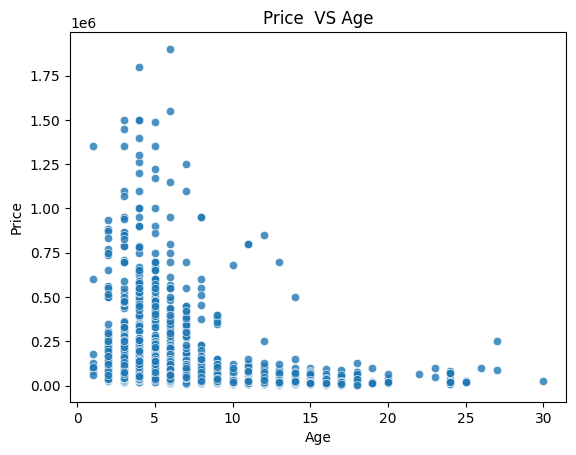

In [ ]:
# scatter plot price vs Age

sns.scatterplot(data=df,x='age',y='price',alpha=0.8)
plt.title("Price  VS Age")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

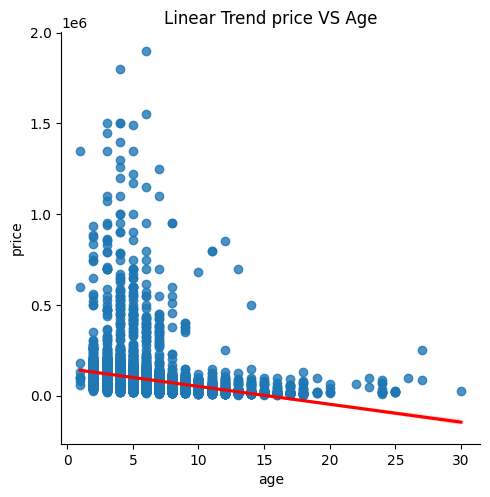

In [ ]:
sns.lmplot(data=df,x='age',y='price',line_kws={'color':'red'})
plt.title("Linear Trend price VS Age")
plt.show()

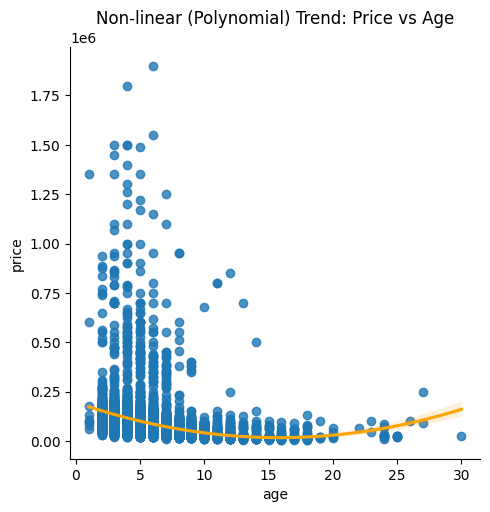

In [ ]:
sns.lmplot(x='age', y='price', data=df, order=2, line_kws={'color': 'orange'})
plt.title('Non-linear (Polynomial) Trend: Price vs Age')
plt.show()

In [ ]:
corr = df['age'].corr(df['price'])
print("Correlation between Age and Price:", corr)

Correlation between Age and Price: -0.27362737384578384


In [ ]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price,price_log
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,first owner,3,110,Tvs,82500,10.463132
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000,first owner,4,350,Royal Enfield,230000,11.694422
2,Triumph Daytona 675R,600000.0,Delhi,110,first owner,8,675,Triumph,1100000,13.304687
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329,first owner,4,180,Tvs,140000,11.082158
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000,first owner,3,150,Yamaha,150000,11.289794
...,...,...,...,...,...,...,...,...,...,...
7307,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587,first owner,8,150,Hero,120000,10.126671
7308,Bajaj Avenger 220cc,35000.0,Bangalore,60000,first owner,9,220,Bajaj,160000,10.463132
7309,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430,first owner,4,750,Harley-Davidson,630000,13.017005
7310,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300,first owner,4,400,Bajaj,245000,11.842236


11. What is the depreciation rate? Create a new column depreciation_pct = (Original Price - price) / Original Price and analyze its distribution.

In [ ]:
# all data price and original price to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['original_price'] = pd.to_numeric(df['Original Price'], errors='coerce')  # if present
df = df.dropna(subset=['price', 'original_price'])
df

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price,price_log,original_price
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,first owner,3,110,Tvs,82500,10.463132,82500
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000,first owner,4,350,Royal Enfield,230000,11.694422,230000
2,Triumph Daytona 675R,600000.0,Delhi,110,first owner,8,675,Triumph,1100000,13.304687,1100000
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329,first owner,4,180,Tvs,140000,11.082158,140000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000,first owner,3,150,Yamaha,150000,11.289794,150000
...,...,...,...,...,...,...,...,...,...,...,...
7307,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587,first owner,8,150,Hero,120000,10.126671,120000
7308,Bajaj Avenger 220cc,35000.0,Bangalore,60000,first owner,9,220,Bajaj,160000,10.463132,160000
7309,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430,first owner,4,750,Harley-Davidson,630000,13.017005,630000
7310,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300,first owner,4,400,Bajaj,245000,11.842236,245000


In [ ]:
df['depreciation_pct'] = (df['original_price'] - df['price']) / df['original_price']

df['depreciation_pct'] = df['depreciation_pct'] * 100
df['depreciation_pct']


0       57.575758
1       47.869565
2       45.454545
3       53.571429
4       46.666667
          ...    
7307    79.166667
7308    78.125000
7309    28.571429
7310    43.265306
7311    50.000000
Name: depreciation_pct, Length: 7289, dtype: float64

In [ ]:
# Handle invald value
df = df[df['depreciation_pct'] >= 0]
df = df[df['depreciation_pct'] <= 100]
df

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price,price_log,original_price,depreciation_pct
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,first owner,3,110,Tvs,82500,10.463132,82500,57.575758
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000,first owner,4,350,Royal Enfield,230000,11.694422,230000,47.869565
2,Triumph Daytona 675R,600000.0,Delhi,110,first owner,8,675,Triumph,1100000,13.304687,1100000,45.454545
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329,first owner,4,180,Tvs,140000,11.082158,140000,53.571429
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000,first owner,3,150,Yamaha,150000,11.289794,150000,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
7307,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587,first owner,8,150,Hero,120000,10.126671,120000,79.166667
7308,Bajaj Avenger 220cc,35000.0,Bangalore,60000,first owner,9,220,Bajaj,160000,10.463132,160000,78.125000
7309,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430,first owner,4,750,Harley-Davidson,630000,13.017005,630000,28.571429
7310,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300,first owner,4,400,Bajaj,245000,11.842236,245000,43.265306


In [36]:
df[df['power']>1000]['brand'].unique()

array(['Ducati', 'Suzuki', 'Indian', 'Benelli', 'Triumph',
       'Harley-Davidson', 'Mv'], dtype=object)

In [ ]:
df['depreciation_pct'].describe()

count    7274.000000
mean       58.879622
std        15.623465
min         0.000000
25%        48.266667
50%        60.000000
75%        70.588235
max        95.000000
Name: depreciation_pct, dtype: float64

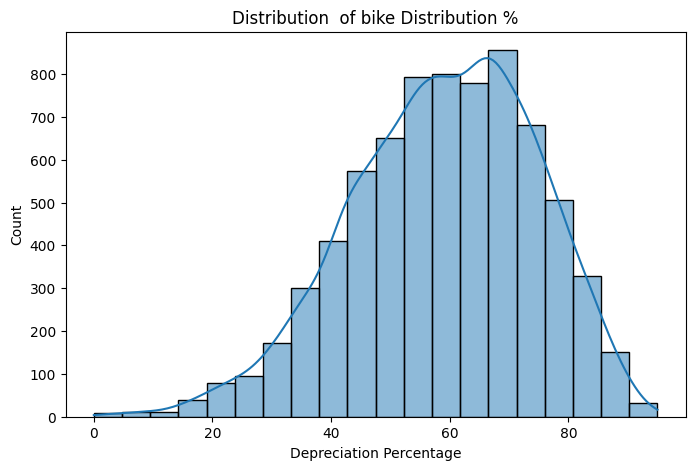

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['depreciation_pct'],bins=20,kde=True)
plt.title("Distribution  of bike Distribution %") 
plt.xlabel('Depreciation Percentage')
plt.ylabel('Count')
plt.show()

In [ ]:
brand_depr = df.groupby('brand')['depreciation_pct'].mean().sort_values()
print(brand_depr)


brand
Jawa               13.560976
Bmw                19.243298
Mv                 28.005051
Benelli            33.062260
Triumph            33.776256
Harley-Davidson    34.418286
Ducati             35.022897
Kawasaki           39.494250
Indian             43.030303
Ktm                43.560762
Hyosung            44.111054
Royal Enfield      53.085448
Mahindra           54.267839
Suzuki             56.999061
Tvs                60.058819
Honda              60.926937
Hero               63.314536
Bajaj              63.621443
Yamaha             65.408758
Lml                94.133333
Name: depreciation_pct, dtype: float64


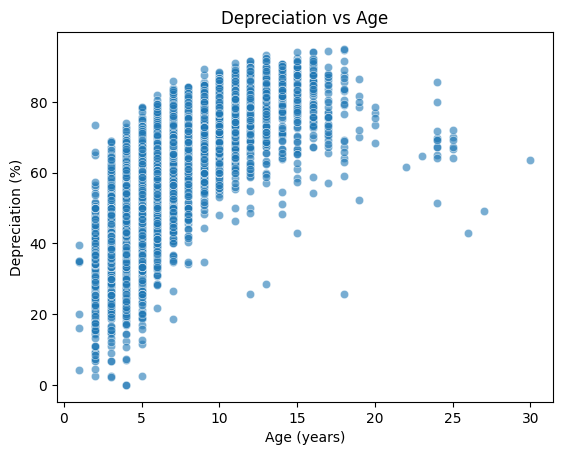

In [ ]:
sns.scatterplot(x='age', y='depreciation_pct', data=df, alpha=0.6)
plt.title('Depreciation vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Depreciation (%)')
plt.show()


12. Does power (cc) strongly correlate with price? Are there outliers (e.g., high-power bikes sold very cheaply)?

In [ ]:
# concert a power & price numeric
df['power'] = pd.to_numeric(df['power'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['power', 'price'])
df

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price,price_log,original_price,depreciation_pct
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654,first owner,3,110,Tvs,82500,10.463132,82500,57.575758
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000,first owner,4,350,Royal Enfield,230000,11.694422,230000,47.869565
2,Triumph Daytona 675R,600000.0,Delhi,110,first owner,8,675,Triumph,1100000,13.304687,1100000,45.454545
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329,first owner,4,180,Tvs,140000,11.082158,140000,53.571429
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000,first owner,3,150,Yamaha,150000,11.289794,150000,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
7307,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587,first owner,8,150,Hero,120000,10.126671,120000,79.166667
7308,Bajaj Avenger 220cc,35000.0,Bangalore,60000,first owner,9,220,Bajaj,160000,10.463132,160000,78.125000
7309,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430,first owner,4,750,Harley-Davidson,630000,13.017005,630000,28.571429
7310,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300,first owner,4,400,Bajaj,245000,11.842236,245000,43.265306


In [ ]:
# Correlation bet power & price
corr = df['power'].corr(df['price'])
print("Correlation between Power and Price = ", corr)

Correlation between Power and Price =  0.8102177448643855


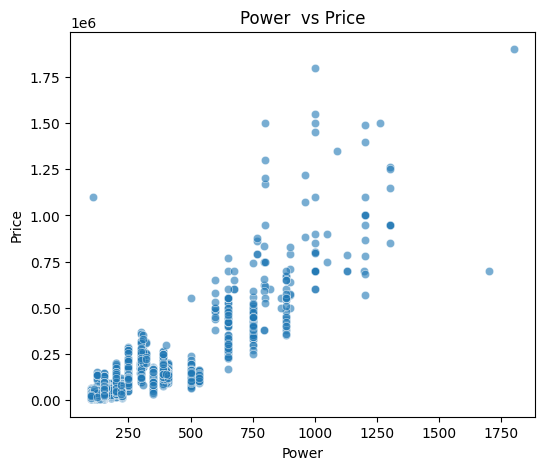

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x='power',y='price',alpha=0.6)
plt.title('Power  vs Price')
plt.xlabel("Power")
plt.ylabel("Price")
plt.show()

13. How does city affect pricing? Are bikes in metro cities (Delhi, Mumbai, Bangalore) priced higher than others?

In [ ]:
# Define metro cities
metro_cities = ['Delhi', 'Mumbai', 'Bangalore']
metro_cities


['Delhi', 'Mumbai', 'Bangalore']

In [ ]:
# Create new column
df['is_metro'] = df['city'].isin(metro_cities)
df['is_metro']

0       False
1        True
2        True
3        True
4        True
        ...  
7307     True
7308     True
7309    False
7310    False
7311    False
Name: is_metro, Length: 7274, dtype: bool

In [ ]:
# Average price comparison
avg_prices = df.groupby('is_metro')['price'].mean()
print(avg_prices)

is_metro
False    76926.965291
True     95783.831786
Name: price, dtype: float64


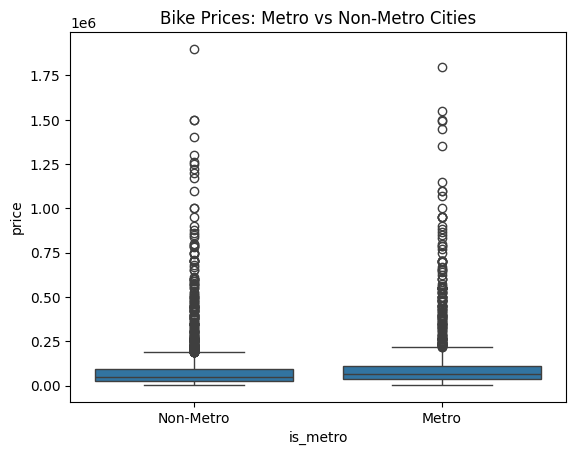

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='is_metro', y='price', data=df)
plt.xticks([0, 1], ['Non-Metro', 'Metro'])
plt.title('Bike Prices: Metro vs Non-Metro Cities')
plt.show()

14. Create suitable visualizations (histograms, boxplots, and scatter plots) for key numerical features such as price, kms_driven, age, and power.

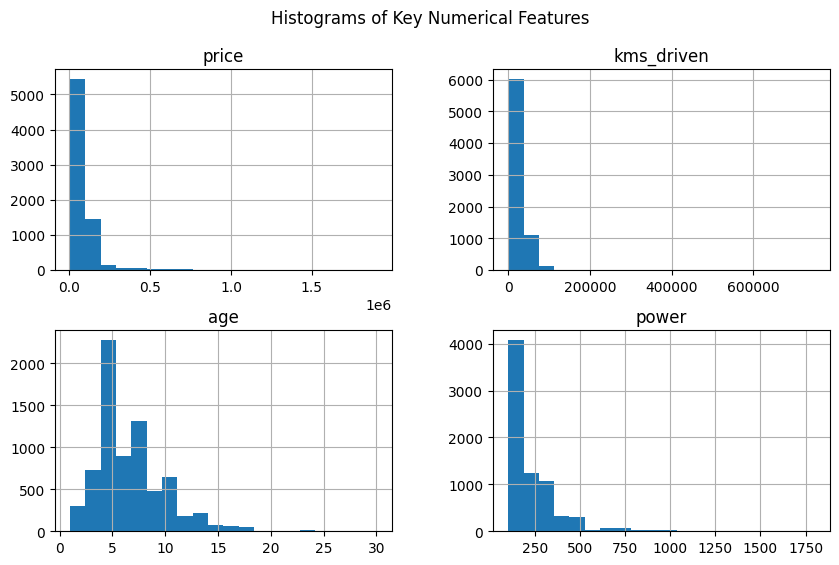

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['price', 'kms_driven', 'age', 'power']

# Histograms
df[num_cols].hist(figsize=(10,6), bins=20)
plt.suptitle("Histograms of Key Numerical Features")
plt.show()

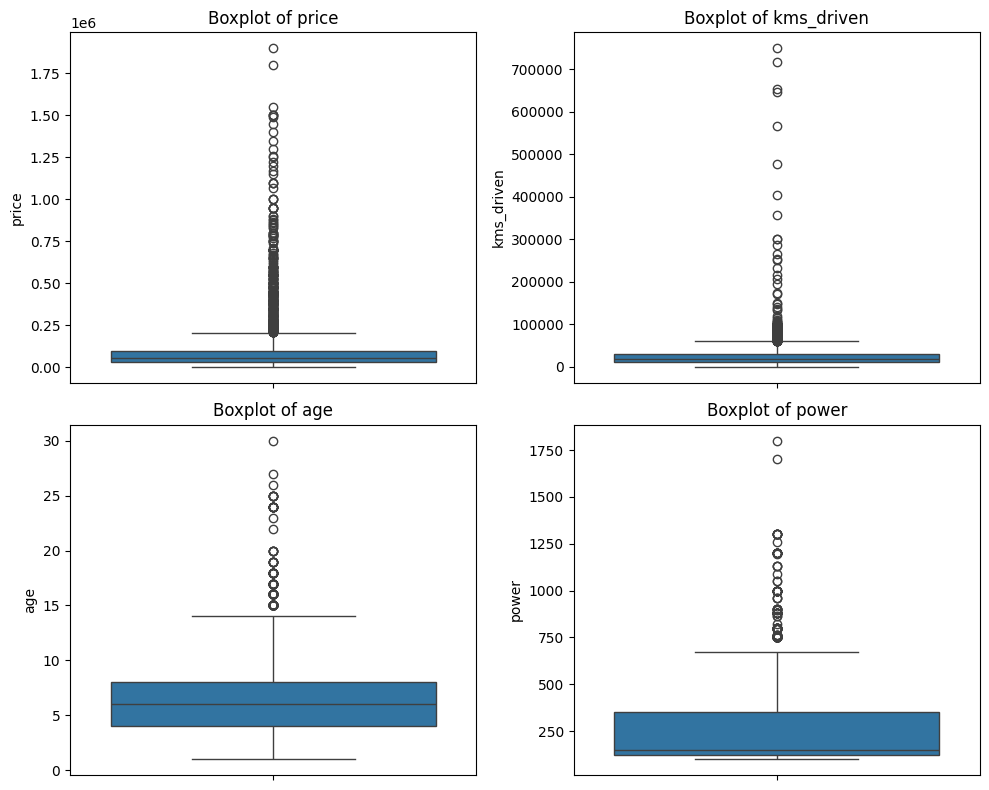

In [ ]:
# Boxplots
plt.figure(figsize=(10,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

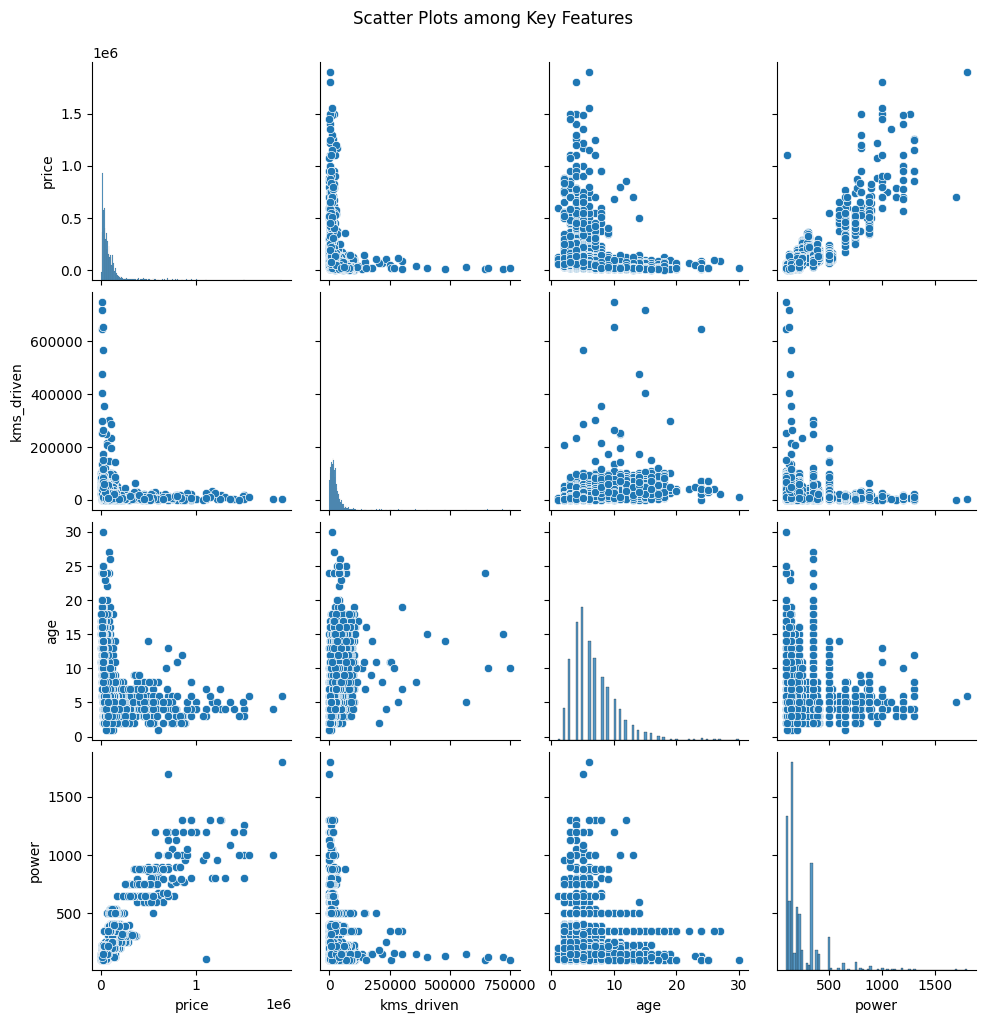

In [ ]:
# Scatter plots (pairwise relations)
sns.pairplot(df[num_cols])
plt.suptitle("Scatter Plots among Key Features",y=1.02)
plt.show()

15. Plot bar charts showing average price and depreciation by brand and city.

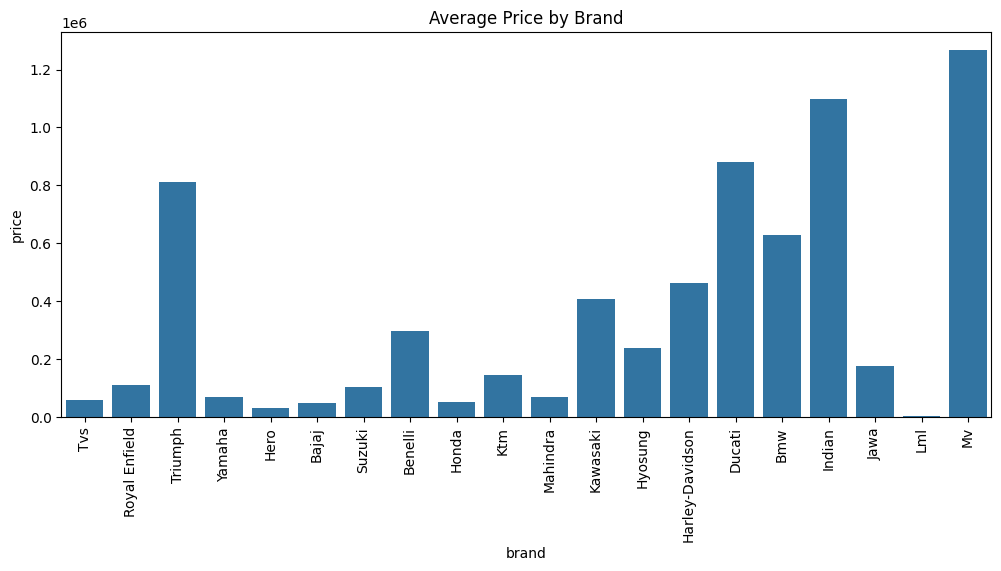

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average Price by Brand
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='brand', y='price', estimator='mean', errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Price by Brand')
plt.show()

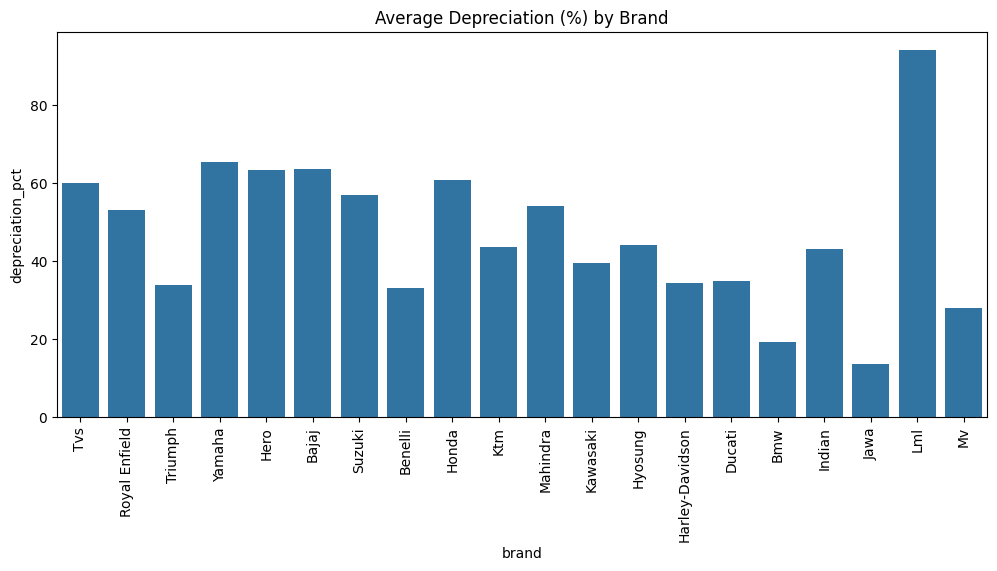

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average Depreciation by Brand
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='brand', y='depreciation_pct', estimator='mean', errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Depreciation (%) by Brand')
plt.show()

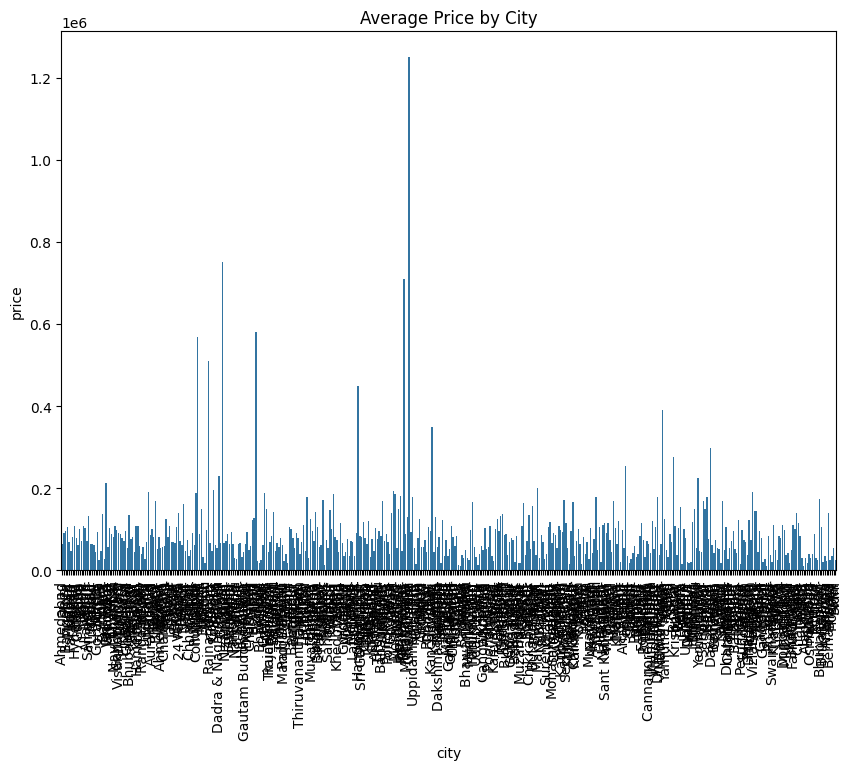

In [ ]:
# Average Price by City
plt.figure(figsize=(10,7))
sns.barplot(x='city', y='price', data=df, estimator='mean', errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Price by City')
plt.show()

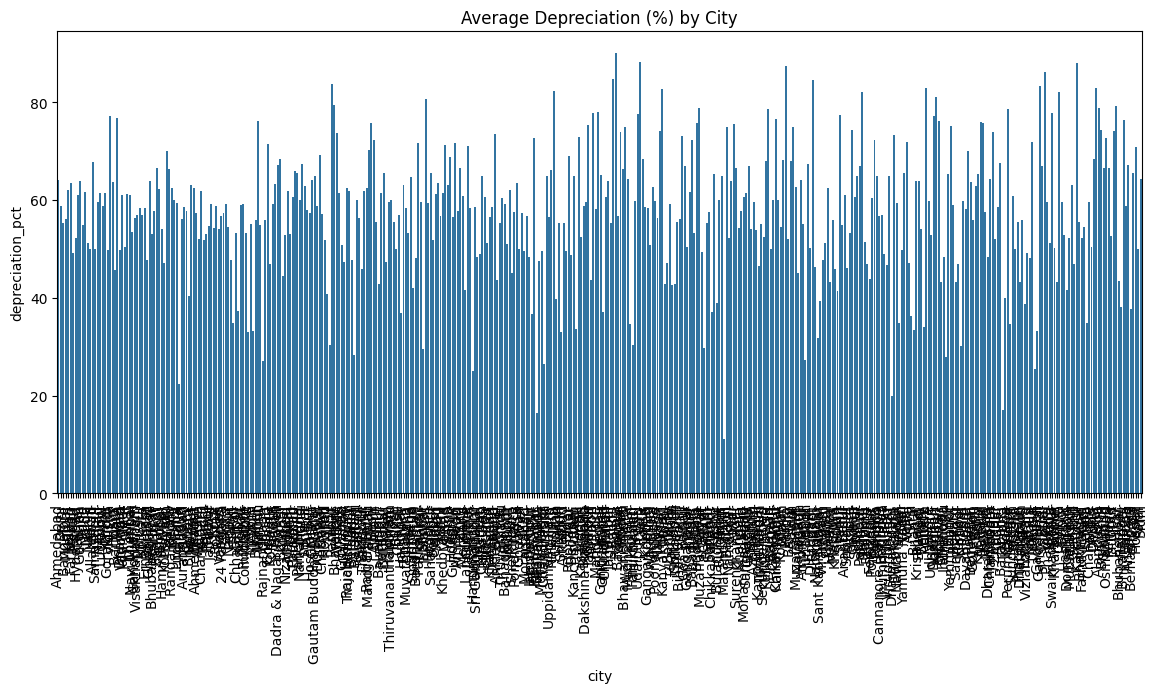

In [ ]:
# Average Depreciation by City
plt.figure(figsize=(14,6))
sns.barplot(x='city', y='depreciation_pct', data=df, estimator='mean', errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Depreciation (%) by City')
plt.show()

16. Create correlation heatmap among numerical variables (price, age, kms_driven, power, depreciation_pct).

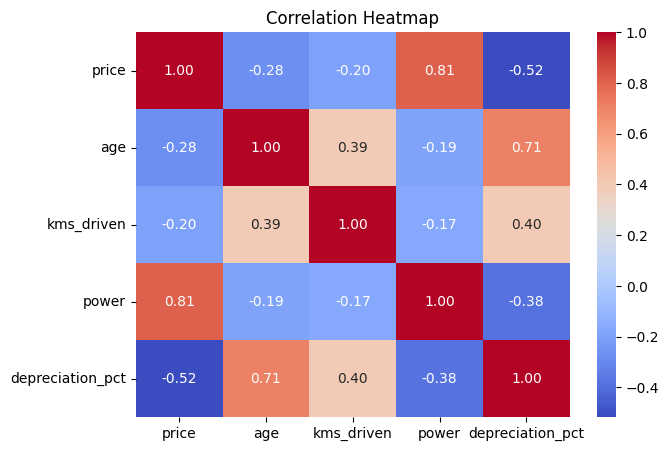

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = ['price', 'age', 'kms_driven', 'power', 'depreciation_pct']

# Compute correlation
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

17. Compute summary statistics (mean, median, mode, standard deviation, skewness, kurtosis) for numerical features.in sort solve

In [ ]:
from scipy.stats import skew, kurtosis

num_cols = ['price', 'age', 'kms_driven', 'power', 'depreciation_pct']

summary = df[num_cols].agg(['mean', 'median', 'std']).T
summary['mode'] = [df[c].mode()[0] for c in num_cols]
summary['skewness'] = [skew(df[c].dropna()) for c in num_cols]
summary['kurtosis'] = [kurtosis(df[c].dropna()) for c in num_cols]

print(summary)

                          mean   median            std     mode   skewness  \
price             83908.205527  55000.0  117468.493708  35000.0   6.342797   
age                   6.633214      6.0       3.345609      5.0   1.345737   
kms_driven        23950.092659  19000.0   27326.518048  15000.0  11.759306   
power               227.685455    150.0     157.215597    150.0   2.591720   
depreciation_pct     58.879622     60.0      15.623465     50.0  -0.389703   

                    kurtosis  
price              57.215990  
age                 2.928257  
kms_driven        247.727676  
power              10.465187  
depreciation_pct   -0.114897  
